# QAM Modulation and Demodulation

QAM Modulation varies the amplitude and phase of a signal (or equivalently its in-phase component and its quadrature component) to modulate information, and can be demodulated using a product demodulator. (Both ASK and PSK modulation can be handled as a special case of QAM Modulation).

In [1]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

The central identity behind these modulation modes demonstrates the frequency content of the product of two sinusoidal functions:

\begin{align*}
e^{j\omega_1 t} \cos(\omega_2 t) &= e^{j\omega_1 t} \frac{e^{j\omega_2 t}+e^{-j\omega_2 t}}{2} \\
&=\frac{1}{2}(e^{jt(\omega_1+\omega_2)}+e^{jt(\omega_1-\omega_2)})
\end{align*}

We demonstrate this with plots below:

In [3]:
timearray=np.arange(0,4,0.01)
carrier=np.cos(2*np.pi*6*timearray)
example_sig=0.5*np.cos(2*np.pi*timearray)
modulated_example_sig=carrier*example_sig

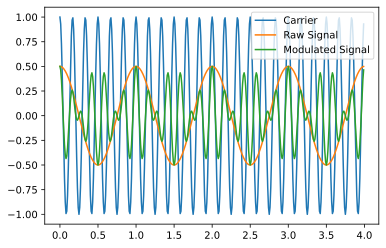

In [4]:
plt.plot(timearray,carrier,
         timearray,example_sig,
         timearray,modulated_example_sig)
plt.legend(["Carrier","Raw Signal","Modulated Signal"])
plt.show()

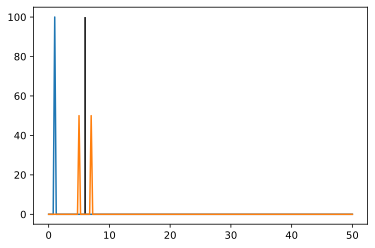

In [5]:
example_sig_fft=np.fft.rfft(example_sig)
modulated_example_sig_fft=np.fft.rfft(modulated_example_sig)
example_freqs=np.fft.rfftfreq(len(example_sig),d=0.01)
plt.plot(example_freqs,np.abs(example_sig_fft),
         example_freqs,np.abs(modulated_example_sig_fft))
plt.vlines([6],0,100)
plt.show()

## Modulation

We express the product modulation as an analytic signal:

$$e^{2 \pi j f t}\left(I(t)+jQ(t)\right)=
I(t)\cos(2 \pi f t)-Q(t)\sin(2 \pi f t)
+jI(t)\sin(2 \pi f t)+jQ(t)\cos(2 \pi f t)$$

so

$$\Re\left(e^{2 \pi j f t}\left(I(t)+jQ(t)\right)\right)=
I(t)\cos(2 \pi f t)-Q(t)\sin(2 \pi f t)$$

We also note that $e^{2 \pi j f t}\left(I(t)+jQ(t)\right)$ has only positive frequency components, and that the real part will have an even Fourier Transform. This demonstrates the information recovery aspect of an analytic signal, including the fact that the real part contains enough information to reconstruct both $I(t)$ and $Q(t)$.

## Demodulation

We demodulate my multiplying by the carrier, producing

$$e^{2 \pi j f t} \left(I(t)\cos(2 \pi f t)-Q(t)\sin(2 \pi f t) \right)=\frac{1}{2}(I(t)-jQ(t))+k\left(e^{4\pi jft}\right)$$

The high frequency terms are filtered out, leaving $\frac{1}{2}(I(t)-jQ(t))$.